<a href="https://colab.research.google.com/github/haidaraf6/My-Project/blob/main/SVM_WOA_STANDARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membuka Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Melihat ukuran data
data.shape

(768, 9)

In [ ]:
# Melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dari hasil informasi diatas diketahui tidak adanya missing value

In [ ]:
# Melihat statistik dari data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Pre-processing Data

### Matriks Korelasi

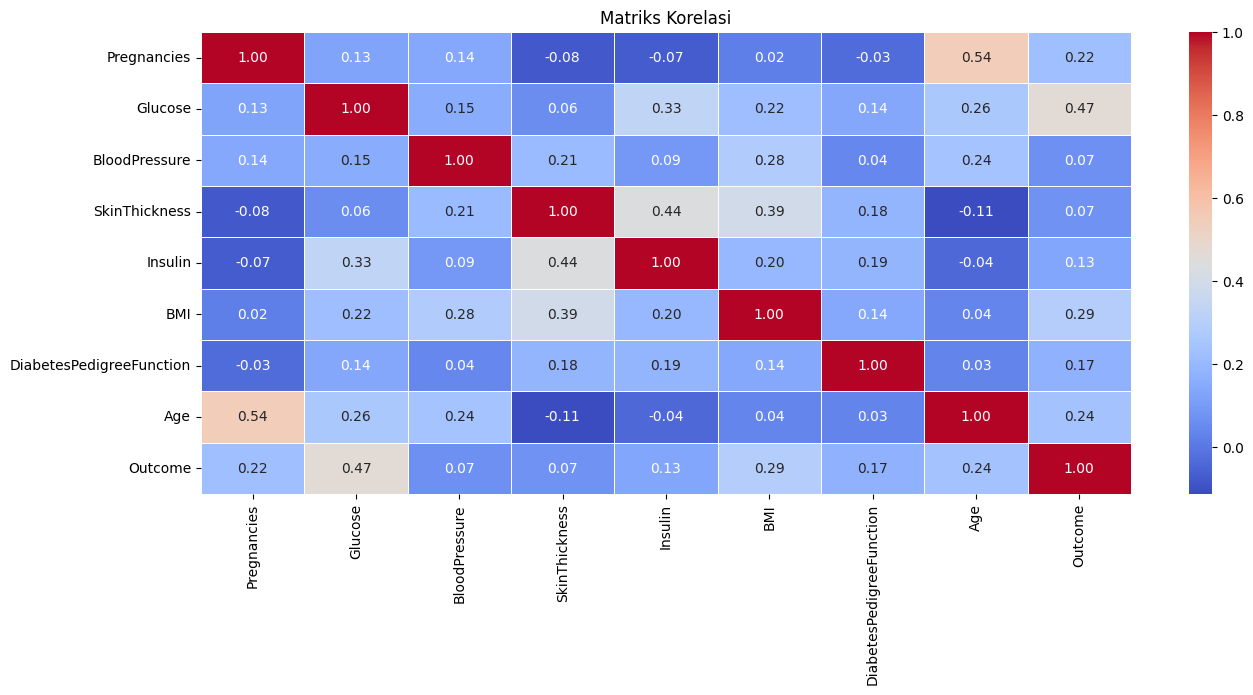

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Mengatur opsi tampilan pandas
pd.set_option('display.max_columns', None)

# Membuat matriks korelasi
corr_matrix = data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

### Deteksi Outlier

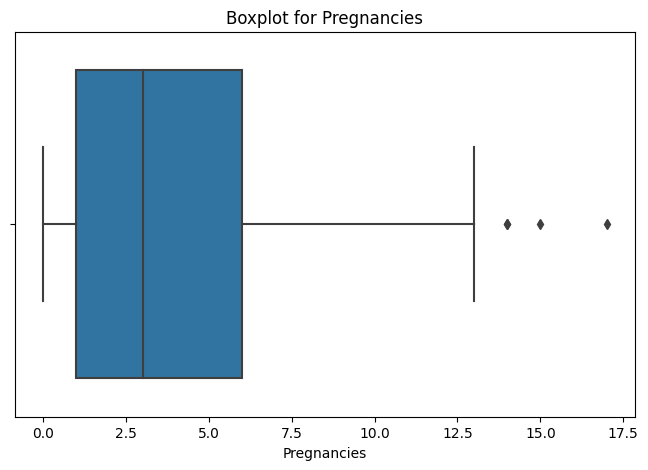

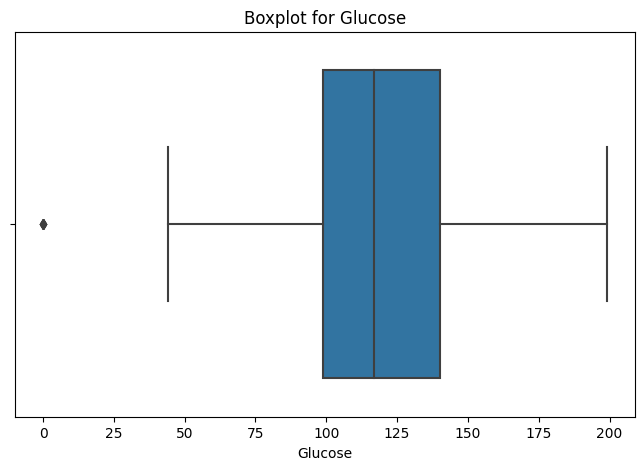

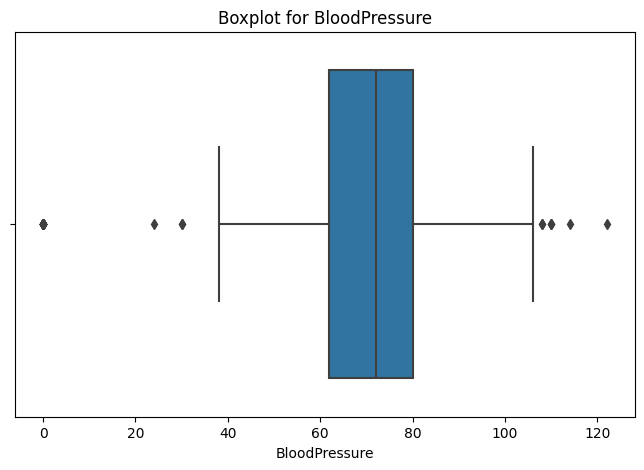

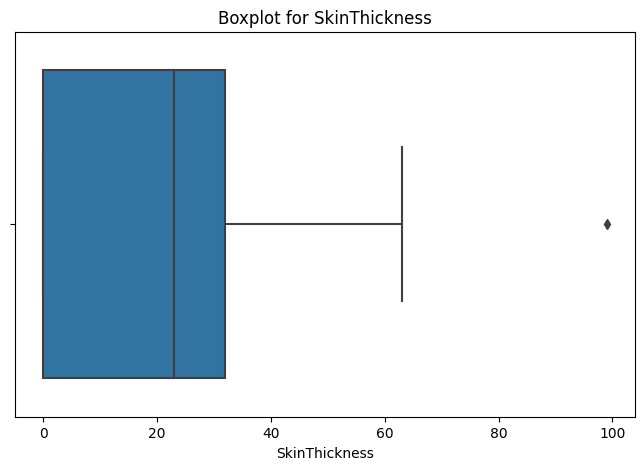

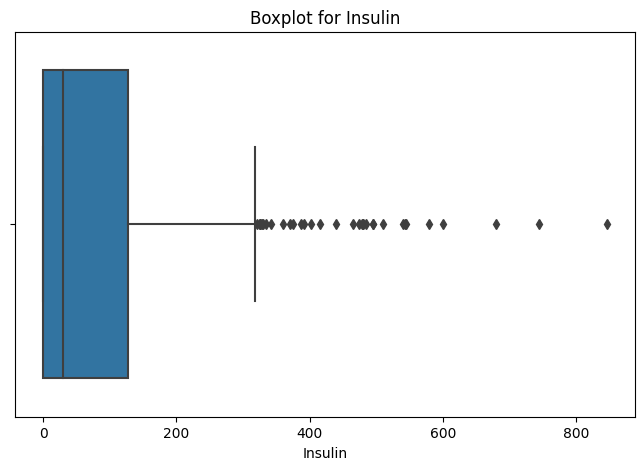

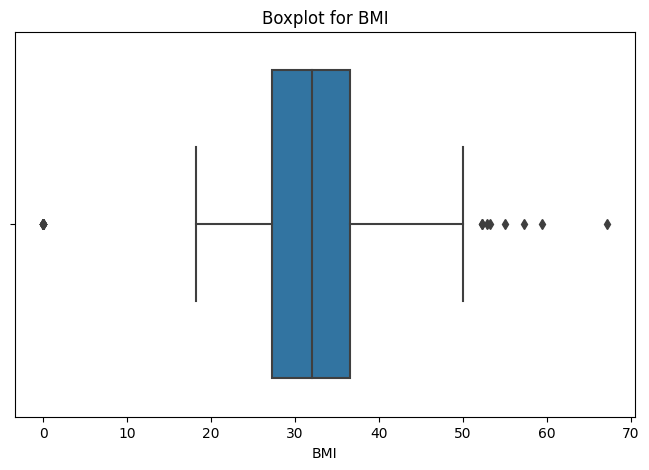

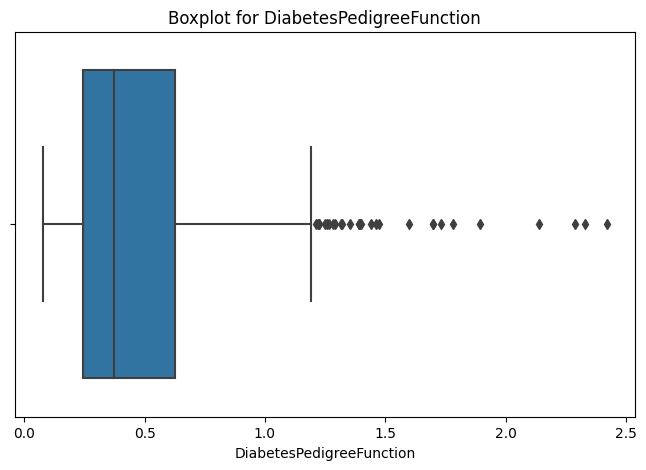

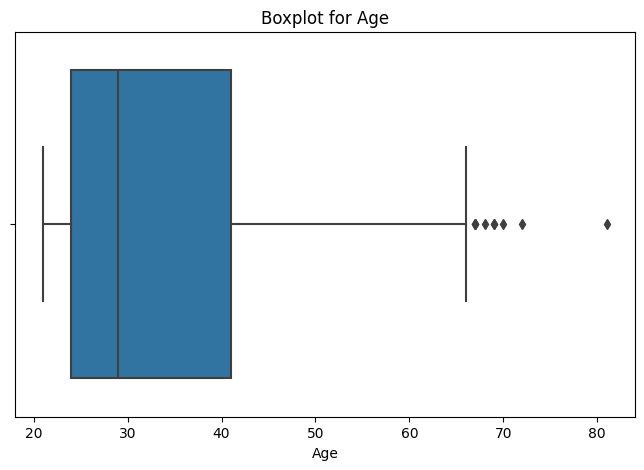

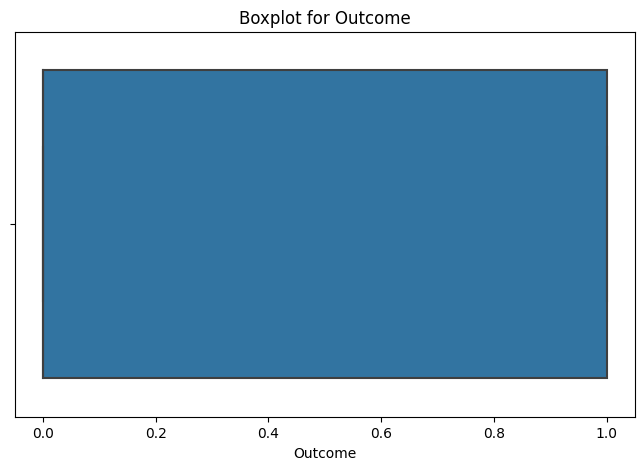

Outliers Count:
                     Column Outliers Count
0               Pregnancies              4
1                   Glucose              5
2             BloodPressure             45
3             SkinThickness              1
4                   Insulin             34
5                       BMI             19
6  DiabetesPedigreeFunction             29
7                       Age              9
8                   Outcome              0


<ipython-input-10-7a5c6aad056a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append({'Column': column, 'Outliers Count': len(outliers)}, ignore_index=True)
<ipython-input-10-7a5c6aad056a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append({'Column': column, 'Outliers Count': len(outliers)}, ignore_index=True)
<ipython-input-10-7a5c6aad056a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append({'Column': column, 'Outliers Count': len(outliers)}, ignore_index=True)
<ipython-input-10-7a5c6aad056a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot(data):
    # Membuat boxplot untuk setiap kolom
    for column in data.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

def count_outliers(data):
    outliers_count = pd.DataFrame(columns=['Column', 'Outliers Count'])

    # Menghitung jumlah outlier untuk setiap kolom
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_count = outliers_count.append({'Column': column, 'Outliers Count': len(outliers)}, ignore_index=True)

    return outliers_count


# Membuat boxplot untuk setiap kolom
plot_boxplot(data)

# Menghitung dan mencetak jumlah outlier untuk setiap kolom
outliers_count_result = count_outliers(data)
print("Outliers Count:")
print(outliers_count_result)


In [ ]:
import pandas as pd
from scipy.stats import shapiro

def test_normality(data):
    normality_test_results = pd.DataFrame(columns=['Column', 'Statistic', 'P-value', 'Normal (H0 Reject)'])

    for column in data.columns:
        # Lakukan uji normalitas Shapiro-Wilk
        stat, p_value = shapiro(data[column])

        # Tentukan apakah distribusi normal berdasarkan nilai p-value
        normality = True if p_value > 0.05 else False

        # Simpan hasil uji normalitas ke dalam DataFrame
        normality_test_results = normality_test_results.append({
            'Column': column,
            'Statistic': stat,
            'P-value': p_value,
            'Normal (H0 Reject)': normality
        }, ignore_index=True)

    return normality_test_results


# Lakukan uji normalitas dan tampilkan hasil
normality_results = test_normality(data)
print("Normality Test Results:")
print(normality_results)


Normality Test Results:
                     Column  Statistic       P-value Normal (H0 Reject)
0               Pregnancies   0.904283  1.610010e-21              False
1                   Glucose   0.970105  1.987465e-11              False
2             BloodPressure   0.818923  1.584494e-28              False
3             SkinThickness   0.904628  1.751800e-21              False
4                   Insulin   0.722021  7.915340e-34              False
5                       BMI   0.949989  1.840759e-15              False
6  DiabetesPedigreeFunction   0.836519  2.477799e-27              False
7                       Age   0.874766  2.401830e-24              False
8                   Outcome   0.602510  1.292262e-38              False


<ipython-input-11-962b4c86692d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_test_results = normality_test_results.append({
<ipython-input-11-962b4c86692d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_test_results = normality_test_results.append({
<ipython-input-11-962b4c86692d>:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  normality_test_results = normality_test_results.append({
<ipython-input-11-962b4c86692d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_test_results = normality_test_results.append({
<ipython-input-11-962b4c86692d>:15: FutureWarnin

### Handling Outliers

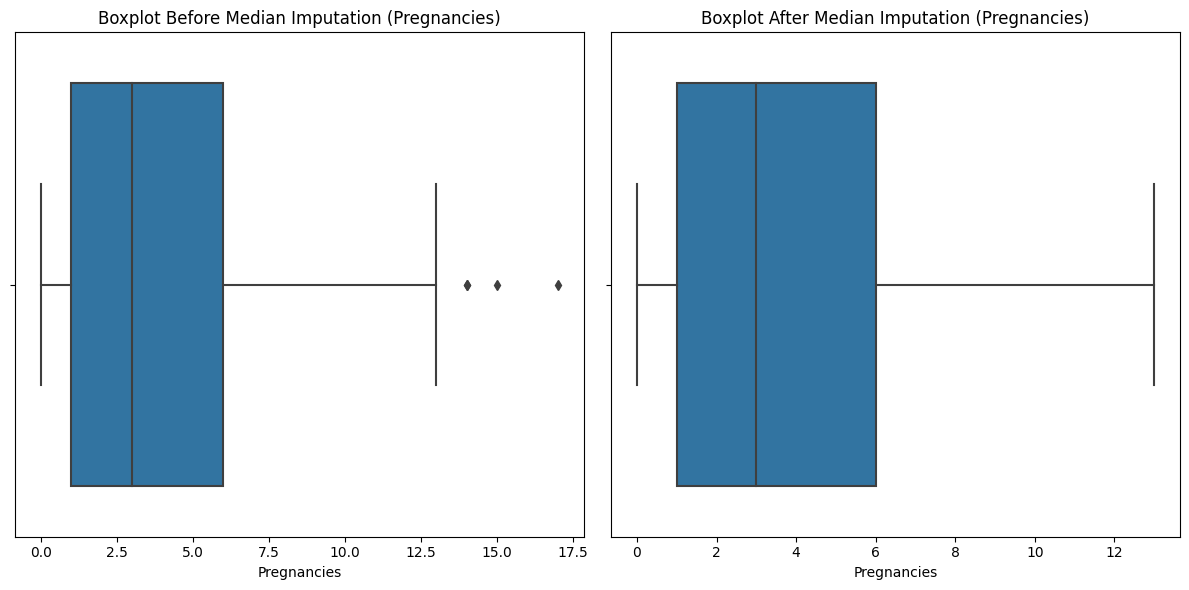

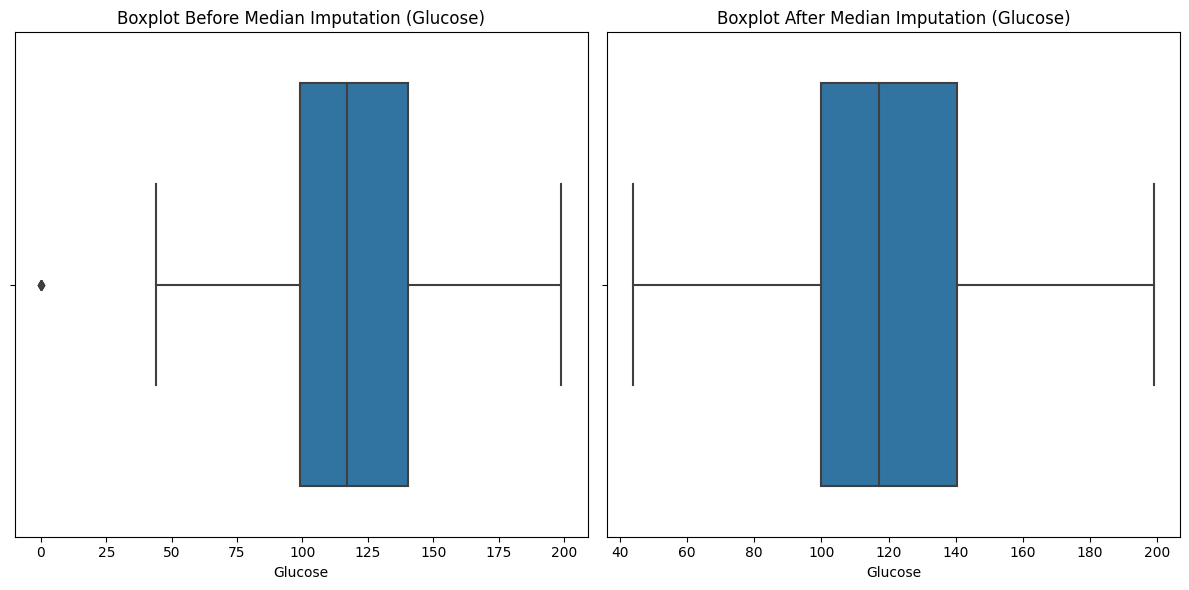

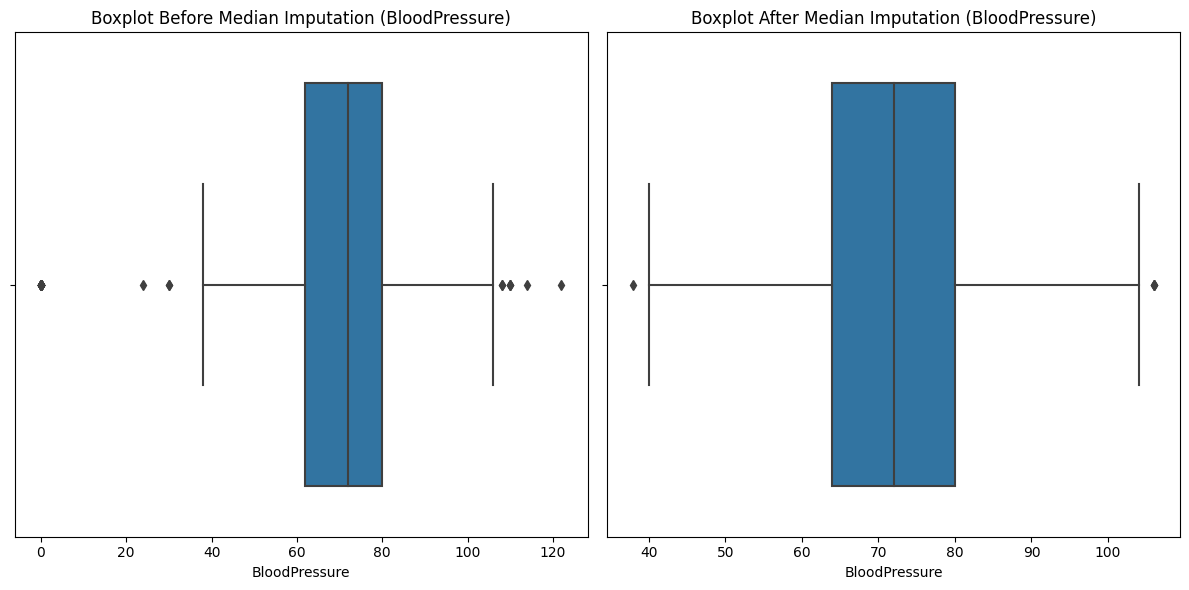

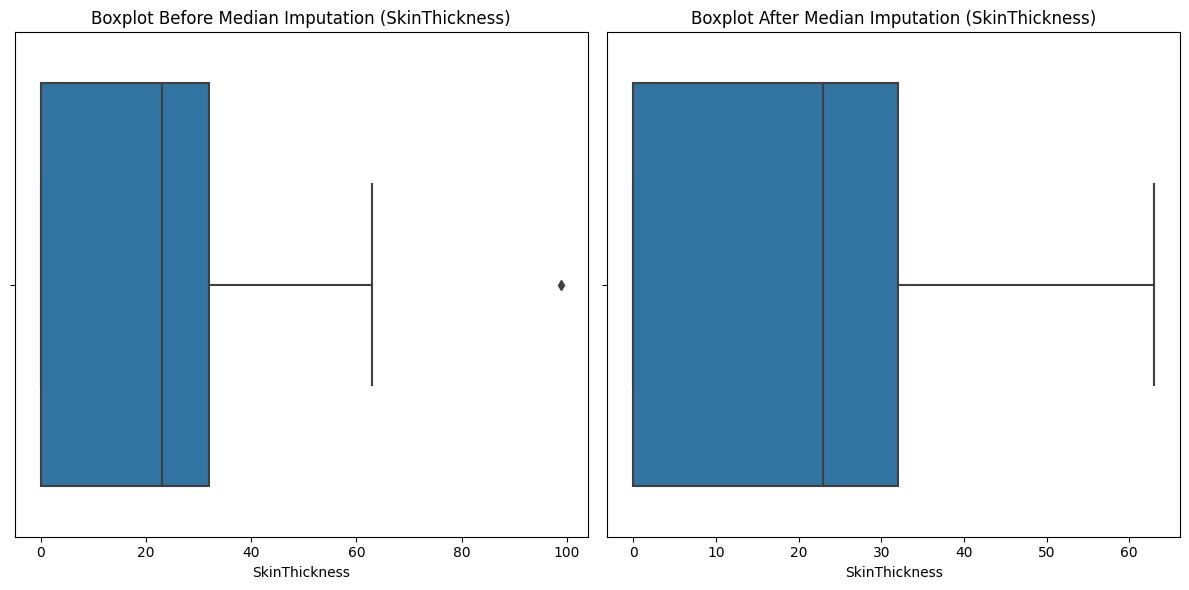

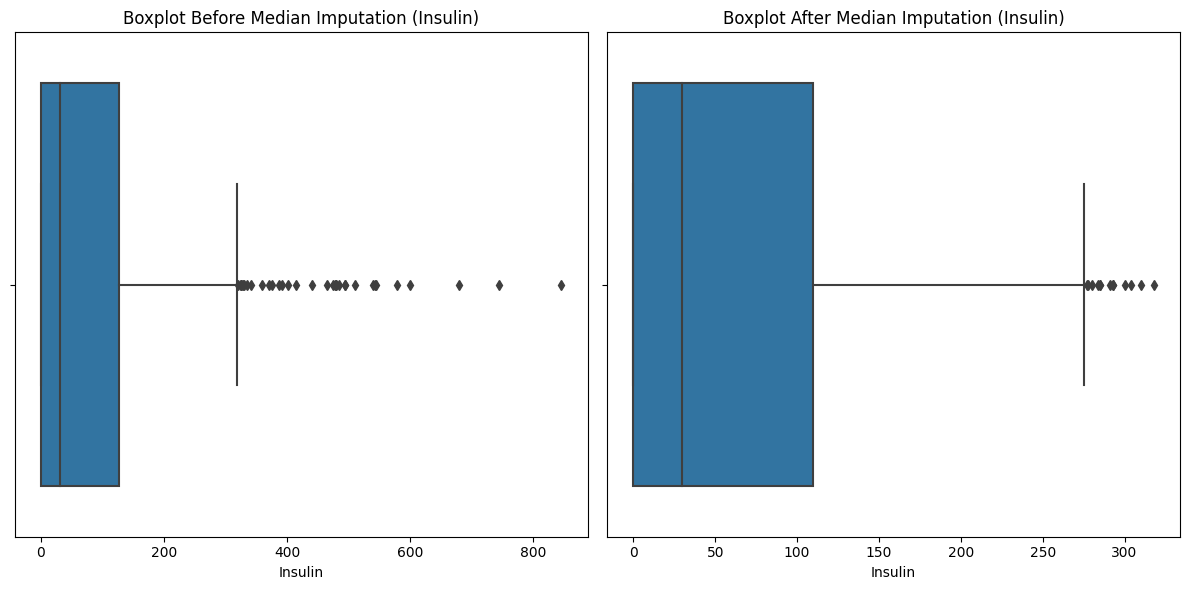

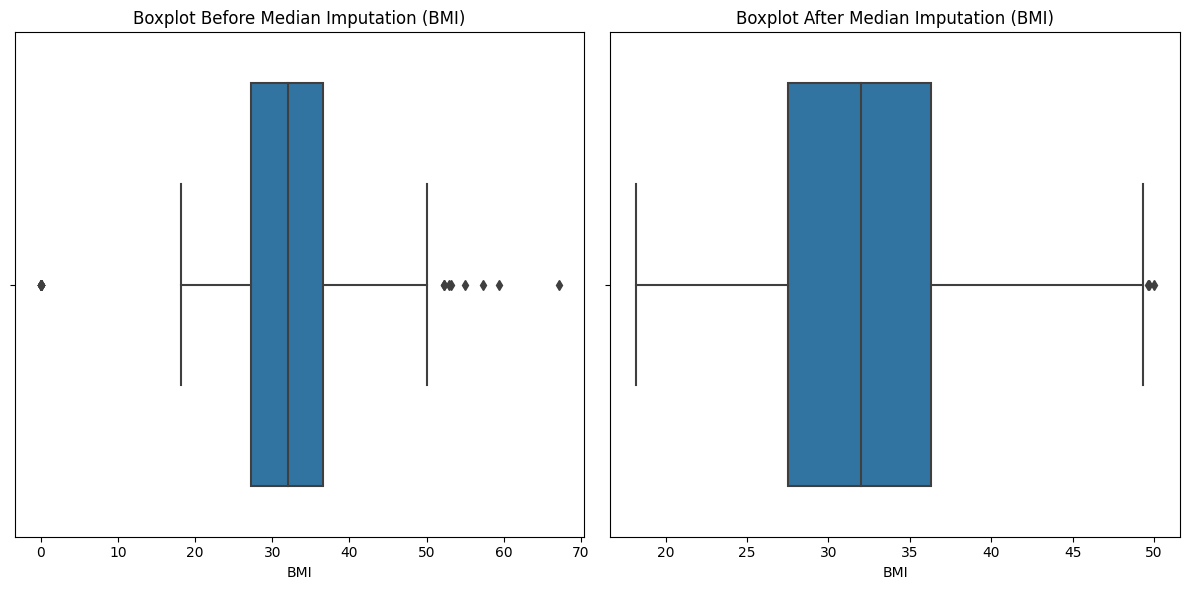

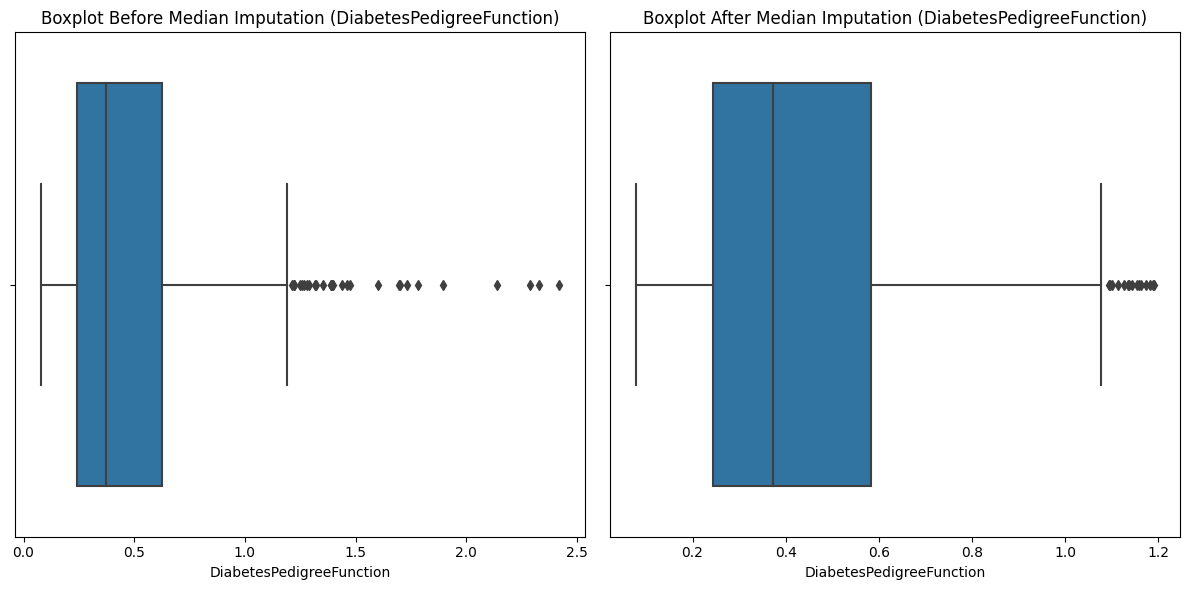

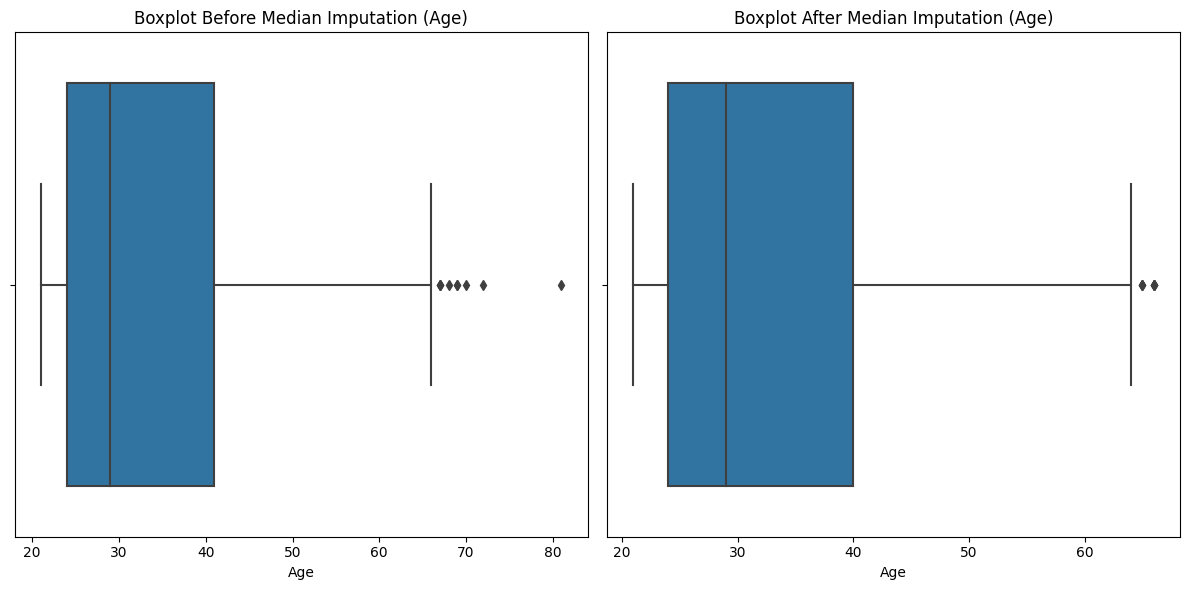

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def impute_outliers_median(data, column):
    # Boxplot sebelum imputasi
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot Before Median Imputation ({column})')

    # Imputasi outlier dengan median
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr

    data[column] = data[column].apply(lambda x: np.median(data[column]) if x > upper_tail or x < lower_tail else x)

    # Boxplot setelah imputasi
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot After Median Imputation ({column})')

    plt.tight_layout()
    plt.show()


# Mengecek kolom yang memiliki nilai numerik (kecuali kolom "Outcome")
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Outcome')

# Melakukan imputasi dan plot untuk setiap kolom numerik
for column in numerical_columns:
    impute_outliers_median(data, column)


### Memisahkan Fitur dan Target

In [ ]:
# Memisahkan fitur dan target
X = data.drop('Outcome', axis=1)  # Fitur
y = data['Outcome']  # Target

### Oversampling

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Melihat jumlah nilai unik sebelum oversampling
print("Jumlah nilai unik sebelum oversampling:", Counter(y))

Jumlah nilai unik sebelum oversampling: Counter({0: 500, 1: 268})


In [ ]:
# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Melihat jumlah nilai unik setelah oversampling
print("Jumlah nilai unik setelah oversampling:", Counter(y))

Jumlah nilai unik setelah oversampling: Counter({1: 500, 0: 500})


### Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

# Menggunakan StandardScaler untuk normalisasi Z-score pada fitur
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Output hasil normalisasi
print("Data setelah normalisasi StandardScaler:")
print(X)


Data setelah normalisasi StandardScaler:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.627033  0.704877      -0.058676       0.886277 -0.791165  0.128421   
1      -0.923497 -1.326394      -0.621825       0.507414 -0.791165 -1.006426   
2       1.247245  1.833360      -0.809541      -1.323755 -0.791165 -1.541425   
3      -0.923497 -1.197424      -0.621825       0.128551  0.362100 -0.763245   
4      -1.233603  0.350210      -3.062137       0.886277  1.269989  1.668570   
..           ...       ...            ...            ...       ...       ...   
995     0.563498  1.234360      -0.734913      -1.323755 -0.791165 -0.146196   
996     0.383541 -0.616524      -0.286716       0.640484 -0.791165  0.477431   
997     0.224460  1.463627       1.055676       0.394559  1.107105  0.079785   
998     1.440553 -0.467993       0.869806       0.741013  1.366433  0.221332   
999     0.142464  0.604113       0.674635       0.738275 -0.791165  0.749077   

# Pembagian Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membagi data menjadi 80% pelatihan dan 20% pengujian
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Membagi data pelatihan menjadi 80% pelatihan dan 20% validasi
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output ukuran setiap bagian
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))
print("Jumlah data pengujian:", len(X_val))

Jumlah data pelatihan: 800
Jumlah data pengujian: 100
Jumlah data pengujian: 100


# SVM

In [ ]:
# Inisialisasi dan melatih model SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Melakukan prediksi pada data pelatihan
y_train_pred = svm_model.predict(X_train)

# Evaluasi model pada data pelatihan
train_accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

# Output hasil evaluasi
print("-----------------------DATA TRAINNING-----------------------")
print("Training Accuracy:", train_accuracy)
print("\nConfusion Matrix:\n", conf_matrix_train)
print("\nClassification Report:\n", class_report_train)
print("----------------------------------------------------------")


# Melakukan prediksi pada data pengujian
y_test_pred = svm_model.predict(X_test)

# Evaluasi model pada data pengujian
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

# Output hasil evaluasi
print("-----------------------DATA TESTING-----------------------")
print("Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", conf_matrix_test)
print("\nClassification Report:\n", class_report_test)
print("----------------------------------------------------------")

-----------------------DATA TRAINNING-----------------------
Training Accuracy: 0.8425

Confusion Matrix:
 [[323  78]
 [ 48 351]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       401
           1       0.82      0.88      0.85       399

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800

----------------------------------------------------------
-----------------------DATA TESTING-----------------------
Test Accuracy: 0.81

Confusion Matrix:
 [[41 13]
 [ 6 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        54
           1       0.75      0.87      0.81        46

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.82      0.81      0.81 

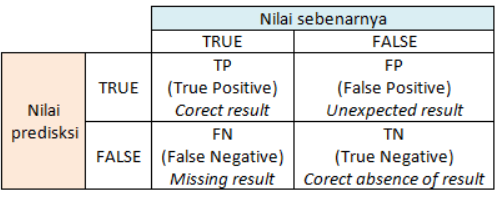

1. True Positive artinya jumlah data yang bernilai positif dan diprediksi benar
sebagai positif
2. True Negative artinya jumlah data yang bernilai negatif dan diprediksi
sebagai negatif
3. False Positive artinya jumlah data yang bernilai negatif tetapi diprediksi
sebagai positif
4. False Negative artinya jumlah data yang bernilai positif tetapi diprediksi
sebagai negatif

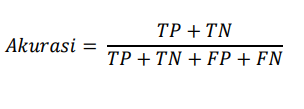


Akurasi mengukur sejauh mana model berhasil memprediksi dengan benar seluruh kelas, baik positif maupun negatif. Model memiliki nilai accuracy yang tinggi
berarti bahwa dari total seluruh data, model
berhasil memprediksi banyak data dengan benar
sesuai dengan label aslinya.

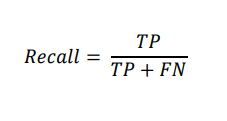

Recall mengukur sejauh mana model berhasil menangkap atau mendeteksi semua kasus positif yang sebenarnya. Nilai recall yang tinggi menunjukkan bahwa model cenderung tidak melewatkan banyak kasus positif.

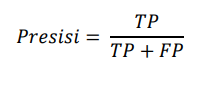

Presisi mengukur sejauh mana model berhasil dalam memprediksi dengan benar kasus positif dari semua kasus yang dinyatakan positif oleh model. Model memiliki
nilai precision yang tinggi berarti bahwa dari
total seluruh data pasien yang diprediksi
menderita diabetes, model berhasil memprediksi
banyak data pasien yang menderita penyakit
diabetes dengan benar dibandingkan pasien yang
sehat tetapi diprediksi sebagai penderita
diabetes.

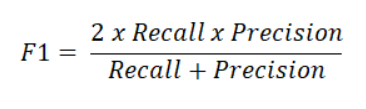

F1-score adalah harmonic mean dari precision dan recall. Harmonic mean memberi bobot lebih besar pada nilai yang lebih rendah, sehingga F1-score akan tinggi hanya jika kedua precision dan recall tinggi. Nilai F1-score tinggi menunjukkan bahwa model memiliki keseimbangan yang baik antara kemampuan memberikan label positif yang benar dan menangkap kasus positif yang sebenarnya.

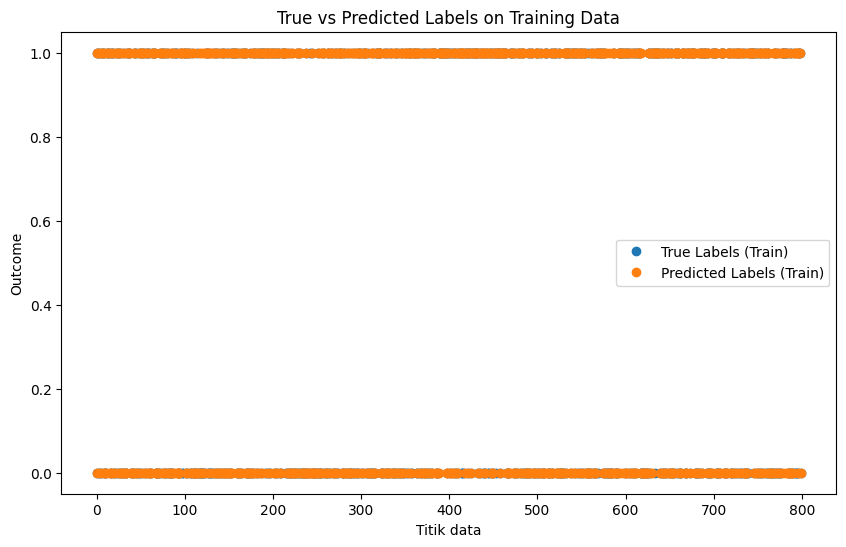

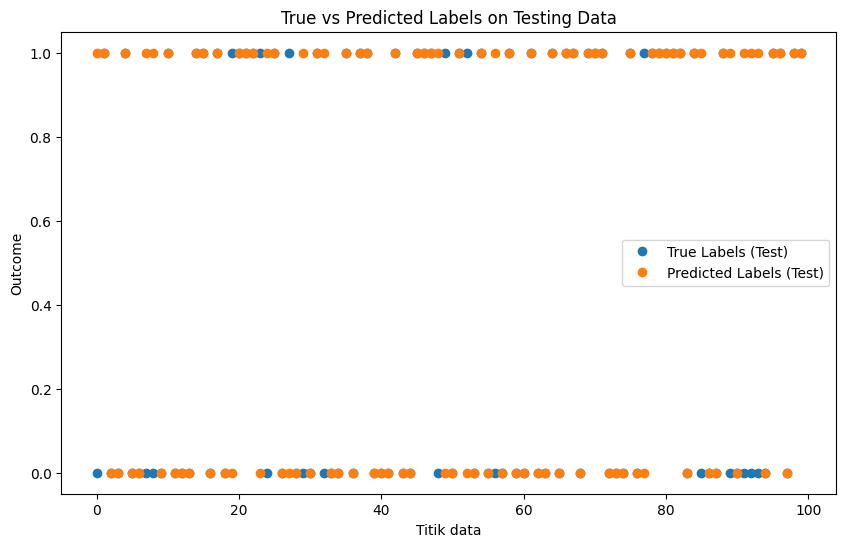

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menghasilkan indeks untuk setiap sampel dalam data pelatihan dan data pengujian
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_test))

# Membuat plot untuk data pelatihan
plt.figure(figsize=(10, 6))
plt.plot(train_indices, y_train, 'o', label='True Labels (Train)')
plt.plot(train_indices, y_train_pred, 'o', label='Predicted Labels (Train)')
plt.title('True vs Predicted Labels on Training Data')
plt.xlabel('Titik data')
plt.ylabel('Outcome')
plt.legend()
plt.show()

# Membuat plot untuk data pengujian
plt.figure(figsize=(10, 6))
plt.plot(test_indices, y_test, 'o', label='True Labels (Test)')
plt.plot(test_indices, y_test_pred, 'o', label='Predicted Labels (Test)')
plt.title('True vs Predicted Labels on Testing Data')
plt.xlabel('Titik data')
plt.ylabel('Outcome')
plt.legend()
plt.show()


# SVM-WOA

In [ ]:
# Whale Optimization Algorithm (WOA) for feature selection
def initialize_whales(num_whales, num_features):
    return np.random.rand(num_whales, num_features)

def fitness(X_train, X_test, y_train, y_test, whale):
    selected_features = np.where(whale > 0.5)[0]

    if len(selected_features) == 0:
        return 0  # Ensure at least one feature is selected

    svm = SVC()
    svm.fit(X_train.iloc[:, selected_features], y_train)
    y_pred = svm.predict(X_test.iloc[:, selected_features])

    return accuracy_score(y_test, y_pred)

def woa_feature_selection(X_train, X_val, X_test, y_train, y_val, y_test, num_whales, num_iterations):
    num_features = X_train.shape[1]
    whales = initialize_whales(num_whales, num_features)

    for iteration in range(num_iterations):
        a = int(2 - 2 * iteration / num_iterations)  # Convert 'a' to an integer

        for i in range(num_whales):
            r1 = np.random.random()  # Random number between 0 and 1
            r2 = np.random.random()

            A = 2 * a * r1 - a
            C = 2 * r2

            # Update position
            D = np.abs(C * whales[i] - X_train.iloc[a, :])
            whales[i] = X_train.iloc[a, :] - A * D

            # Ensure boundaries
            whales[i] = np.maximum(whales[i], 0)
            whales[i] = np.minimum(whales[i], 1)

        # Fitness evaluation
        fitness_values = [fitness(X_train, X_val, y_train, y_val, whale) for whale in whales]
        best_whale_idx = np.argmax(fitness_values)

        # Update the global best
        if iteration == 0 or fitness_values[best_whale_idx] > best_fitness:
            best_whale = whales[best_whale_idx].copy()
            best_fitness = fitness_values[best_whale_idx]

    selected_features = np.where(best_whale > 0.5)[0]

    return selected_features

# Feature selection using WOA on the combined training and validation sets
selected_features = woa_feature_selection(X_train, X_val, X_test, y_train, y_val, y_test, num_whales=40, num_iterations=200)

In [ ]:
print(f"Selected Features: {selected_features}")

Selected Features: [0 1 2 3 4 7]


In [ ]:
# Train SVM with selected features
svm_woa = SVC()
svm_woa.fit(X_train.iloc[:, selected_features], y_train)

SVC()

In [ ]:
# Evaluasi dengan data trainning dari hasil seleksi fitur
y_pred_woa_train = svm_woa.predict(X_train.iloc[:, selected_features])
accuracy_woa_train = accuracy_score(y_train, y_pred_woa_train)
conf_matrix_woa_train = confusion_matrix(y_train, y_pred_woa_train)
class_report_woa_train = classification_report(y_train, y_pred_woa_train)


# Output hasil evaluasi
print("-----------------------DATA TRAINNING-----------------------")
print("Train Accuracy:", accuracy_woa_train)
print("\nConfusion Matrix:\n", conf_matrix_woa_train)
print("\nClassification Report:\n", class_report_woa_train)
print("----------------------------------------------------------")

# Evaluasi dengan data testing dari hasil seleksi fitur
y_pred_woa_test = svm_woa.predict(X_test.iloc[:, selected_features])
accuracy_woa_test = accuracy_score(y_test, y_pred_woa_test)
conf_matrix_woa_test = confusion_matrix(y_test, y_pred_woa_test)
class_report_woa_test = classification_report(y_test, y_pred_woa_test)


# Output hasil evaluasi
print("-----------------------DATA TESTING-----------------------")
print("Test Accuracy:", accuracy_woa_test)
print("\nConfusion Matrix:\n", conf_matrix_woa_test)
print("\nClassification Report:\n", class_report_woa_test)
print("----------------------------------------------------------")

-----------------------DATA TRAINNING-----------------------
Train Accuracy: 0.81875

Confusion Matrix:
 [[316  85]
 [ 60 339]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       401
           1       0.80      0.85      0.82       399

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

----------------------------------------------------------
-----------------------DATA TESTING-----------------------
Test Accuracy: 0.73

Confusion Matrix:
 [[38 16]
 [11 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        54
           1       0.69      0.76      0.72        46

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73   